#  Homework 4
Talia Arauzo

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

### Import Data

In [2]:
train_df = pd.read_csv("data/HW4_Train_Data.csv")
train_df.head()

,UNIX Timestamp (seconds),"Start Time (GMT-0800,PST)","End Time (GMT-0800,PST)",Bldg1 (kWh),Bldg2 (kWh),Bldg3 (kWh),Bldg4 (kWh),Bldg5 (kWh),Bldg6 (kWh),Bldg7 (kWh),...,Bldg14 (kWh),Bldg15 (kWh),Bldg16 (kWh),Bldg17 (kWh),Bldg18 (kWh),Bldg19 (kWh),Bldg20 (kWh),Bldg21 (kWh),Bldg22 (kWh),Bldg23 (kWh)
0,1388851200,1/5/14 00:00,1/5/14 00:59,0.19,0.97,0.03,0.02,0.26,1.47,0.10,...,0.24,1.76,0.11,0.09,0.61,0.03,1.70,3.23,0.14,0.99
1,1388854800,1/5/14 01:00,1/5/14 01:59,0.19,0.83,0.10,0.02,0.26,1.48,0.20,...,0.40,1.49,0.06,0.10,0.77,0.03,1.78,2.42,0.12,0.93
2,1388858400,1/5/14 02:00,1/5/14 02:59,0.19,0.89,0.08,0.08,0.24,1.45,0.10,...,0.36,1.57,0.05,0.08,0.75,0.03,1.68,2.31,0.13,0.47
3,1388862000,1/5/14 03:00,1/5/14 03:59,0.19,0.83,0.03,0.02,0.17,1.45,0.18,...,0.33,1.31,0.06,0.13,0.34,0.02,1.70,2.72,0.14,0.58
4,1388865600,1/5/14 04:00,1/5/14 04:59,0.19,0.83,0.03,0.02,0.18,1.69,0.14,...,0.29,0.03,0.06,0.16,0.15,0.03,1.75,0.69,0.11,0.44


In [3]:
test_df = pd.read_csv("data/HW4_Test_Data.csv")
test_df.head()

,TestTime,TestBldg
0,9/7/14 00:00,0.094276
1,9/7/14 01:00,0.037037
2,9/7/14 02:00,0.040404
3,9/7/14 03:00,0.037037
4,9/7/14 04:00,0.037037


### Problem 1: EDA

<b>Part A:</b> Create a  bar plot of the average hourly energy consumption for each building.

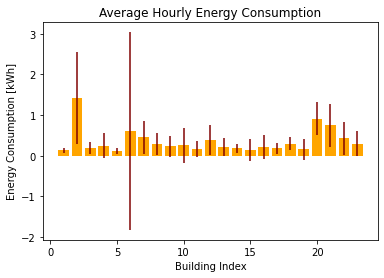

In [4]:
# Mean of energy consumption
consump_mean = train_df.mean(axis = 0).drop("UNIX Timestamp (seconds)")
# Standard deviation of energy consumption
consump_std = train_df.std(axis = 0).drop("UNIX Timestamp (seconds)")
# Building indices
indices = range(1, 24)

# Bar plot with error bars
plt.bar(indices, consump_mean, color = "orange", yerr= consump_std, error_kw=dict(ecolor='maroon'))
plt.xlabel("Building Index")
plt.ylabel("Energy Consumption [kWh]")
plt.title("Average Hourly Energy Consumption");

<b>Part B:</b> Which building has abnormally high variance? Do any buildings have moments of NEGATIVE power
consumption?

In [5]:
# Buidling with highest variance
consump_std.idxmax()

'Bldg6 (kWh)'

In [6]:
# Buildings with negative consumption (neg = True = 1)
neg_consump = train_df.iloc[:, 3:25] < 0
neg_consump = neg_consump.sum()
neg_consump[neg_consump > 0].index

Index(['Bldg6 (kWh)'], dtype='object')

In [7]:
# Drop building 6 from analysis
train_df.drop(columns = "Bldg6 (kWh)", inplace = True)
train_df.head()

,UNIX Timestamp (seconds),"Start Time (GMT-0800,PST)","End Time (GMT-0800,PST)",Bldg1 (kWh),Bldg2 (kWh),Bldg3 (kWh),Bldg4 (kWh),Bldg5 (kWh),Bldg7 (kWh),Bldg8 (kWh),...,Bldg14 (kWh),Bldg15 (kWh),Bldg16 (kWh),Bldg17 (kWh),Bldg18 (kWh),Bldg19 (kWh),Bldg20 (kWh),Bldg21 (kWh),Bldg22 (kWh),Bldg23 (kWh)
0,1388851200,1/5/14 00:00,1/5/14 00:59,0.19,0.97,0.03,0.02,0.26,0.10,0.10,...,0.24,1.76,0.11,0.09,0.61,0.03,1.70,3.23,0.14,0.99
1,1388854800,1/5/14 01:00,1/5/14 01:59,0.19,0.83,0.10,0.02,0.26,0.20,0.11,...,0.40,1.49,0.06,0.10,0.77,0.03,1.78,2.42,0.12,0.93
2,1388858400,1/5/14 02:00,1/5/14 02:59,0.19,0.89,0.08,0.08,0.24,0.10,0.11,...,0.36,1.57,0.05,0.08,0.75,0.03,1.68,2.31,0.13,0.47
3,1388862000,1/5/14 03:00,1/5/14 03:59,0.19,0.83,0.03,0.02,0.17,0.18,0.11,...,0.33,1.31,0.06,0.13,0.34,0.02,1.70,2.72,0.14,0.58
4,1388865600,1/5/14 04:00,1/5/14 04:59,0.19,0.83,0.03,0.02,0.18,0.14,0.09,...,0.29,0.03,0.06,0.16,0.15,0.03,1.75,0.69,0.11,0.44


<b>Part C:</b> Re-organize your energy data set into a 4-D array. In seven separate figures (one for each DoW), plot the hourly energy consumption load shapes for each building and plot the average hourly energy consumption in a thick black line.

In [8]:
# Datetime values of start times
start_time = pd.to_datetime(train_df["Start Time (GMT-0800,PST)"])
# Week-of-year
WoY = start_time.dt.isocalendar().week
# Day-of-week
DoW = start_time.dt.dayofweek
# Hour-of-day
HoD = start_time.dt.hour

# Max hourly consumption per  building
max_consump = train_df.max(axis = 0).iloc[3:25]

# DataFrame of normalized energy for each building
df = train_df.iloc[:, 3:25] / max_consump

# Insert week-of-year column
df.insert(loc = 0, column = "WoY", value = WoY)
# Insert day-of-week column
df.insert(loc = 1, column = "DoW", value = DoW)
# Insert hour-of-day column
df.insert(loc = 2, column = "HoD", value = HoD)

# Change column datatypes
df = df.astype(float)
df = df.astype({"WoY": int, "DoW": int, "HoD": int})

df.head()

,WoY,DoW,HoD,Bldg1 (kWh),Bldg2 (kWh),Bldg3 (kWh),Bldg4 (kWh),Bldg5 (kWh),Bldg7 (kWh),Bldg8 (kWh),...,Bldg14 (kWh),Bldg15 (kWh),Bldg16 (kWh),Bldg17 (kWh),Bldg18 (kWh),Bldg19 (kWh),Bldg20 (kWh),Bldg21 (kWh),Bldg22 (kWh),Bldg23 (kWh)
0,1,6,0,0.234568,0.082343,0.021277,0.006536,0.393939,0.020325,0.034014,...,0.311688,0.530120,0.037931,0.058065,0.354651,0.009524,0.478873,0.922857,0.041543,0.277311
1,1,6,1,0.234568,0.070458,0.070922,0.006536,0.393939,0.040650,0.037415,...,0.519481,0.448795,0.020690,0.064516,0.447674,0.009524,0.501408,0.691429,0.035608,0.260504
2,1,6,2,0.234568,0.075552,0.056738,0.026144,0.363636,0.020325,0.037415,...,0.467532,0.472892,0.017241,0.051613,0.436047,0.009524,0.473239,0.660000,0.038576,0.131653
3,1,6,3,0.234568,0.070458,0.021277,0.006536,0.257576,0.036585,0.037415,...,0.428571,0.394578,0.020690,0.083871,0.197674,0.006349,0.478873,0.777143,0.041543,0.162465
4,1,6,4,0.234568,0.070458,0.021277,0.006536,0.272727,0.028455,0.030612,...,0.376623,0.009036,0.020690,0.103226,0.087209,0.009524,0.492958,0.197143,0.032641,0.123249


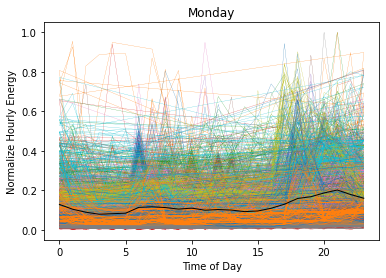

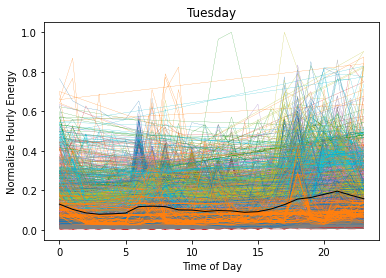

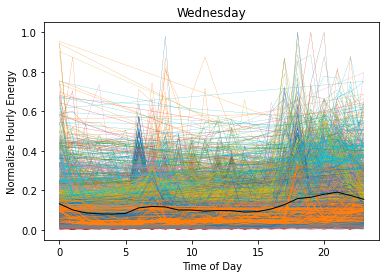

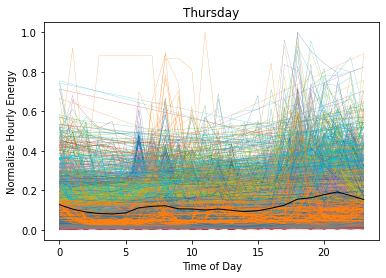

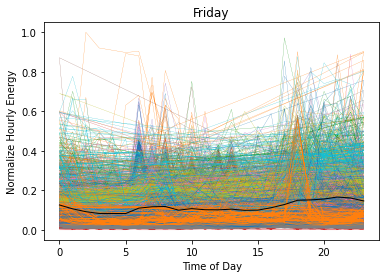

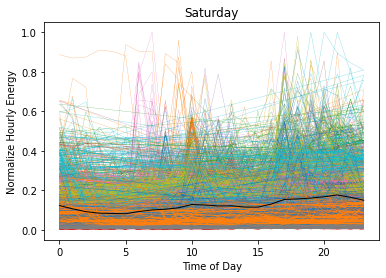

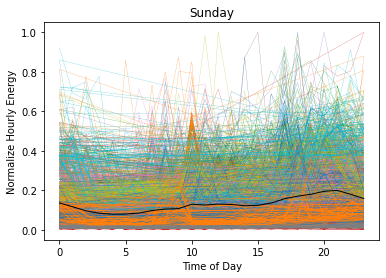

In [9]:
avg_consump = df.iloc[:, 1:25].groupby(["DoW", "HoD"]).mean().mean(axis = 1)

ax = df.groupby("DoW").plot.line(x = "HoD", y = df.drop(columns = ["WoY", "DoW", "HoD"]).columns.values, legend = False, lw = 0.2)
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
for i in range(0, len(days)):
    ax[i].set_title(days[i])
    ax[i].set_xlabel("Time of Day")
    ax[i].set_ylabel("Normalize Hourly Energy")
    ax[i].plot(range(24), avg_consump[i], color = "black", lw = 1);

### Problem 2: Average Model

<b>Part A:</b> Generate seven plots (one for each DoW) which visualize HoD and the normalized
hourly energy for the test data and average model.

In [766]:
# Datetime values of start times
start_time_t = pd.to_datetime(test_df["TestTime"])
# Week-of-year
WoY_t = start_time_t.dt.isocalendar().week
# Day-of-week
DoW_t = start_time_t.dt.dayofweek
# Hour-of-day
HoD_t = start_time_t.dt.hour

# DataFrame of normalized energy for each building
df_t = test_df[["TestBldg"]]

# Insert week-of-year column
df_t.insert(loc = 0, column = "WoY", value = WoY_t)
# Insert day-of-week column
df_t.insert(loc = 1, column = "DoW", value = DoW_t)
# Insert hour-of-day column
df_t.insert(loc = 2, column = "HoD", value = HoD_t)

# Change column datatype
df = df.astype({"WoY": int})

df_t.head()

,WoY,DoW,HoD,TestBldg
0,36,6,0,0.094276
1,36,6,1,0.037037
2,36,6,2,0.040404
3,36,6,3,0.037037
4,36,6,4,0.037037


In [768]:
# Average power consumption from historical data
df_mean = df.iloc[:, 1:3]
df_mean["mean"] = df.iloc[:, 3:].mean(axis = 1)
P_bar = pd.pivot_table(df_mean, index = "DoW", columns = "HoD")

# Predicted average power consumption by average model
P_pred = []
for i in range(0, len(df_t)):
    U = pd.DataFrame(np.zeros((P_bar.shape[0], P_bar.shape[1])))
    U.loc[DoW_t[i], HoD_t[i]] = 1
    P_pred.append(sum(sum(P_bar.values * U.values)))
    
# Add predicted value P_avg to DataFrame
df_t.loc[:,"Avg"] = P_pred
df_t.head()

/Users/taliaarauzo/miniconda3/envs/main/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,WoY,DoW,HoD,TestBldg,Avg
0,36,6,0,0.094276,0.136458
1,36,6,1,0.037037,0.117043
2,36,6,2,0.040404,0.096780
3,36,6,3,0.037037,0.084526
4,36,6,4,0.037037,0.079652


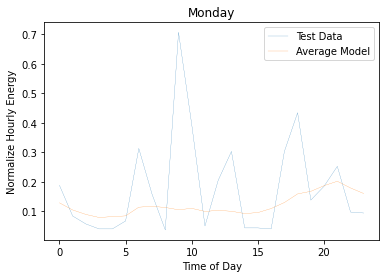

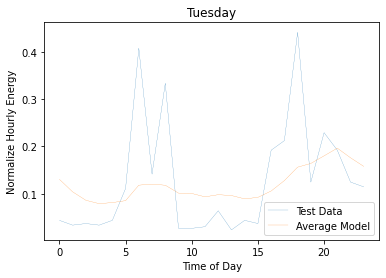

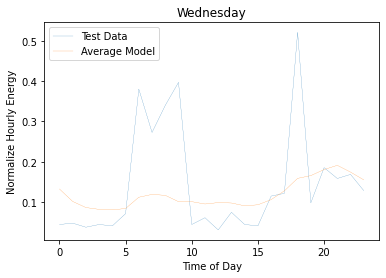

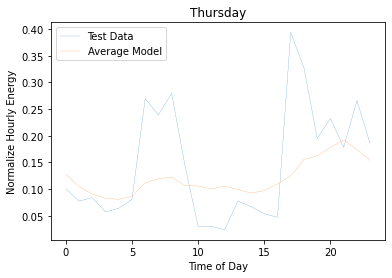

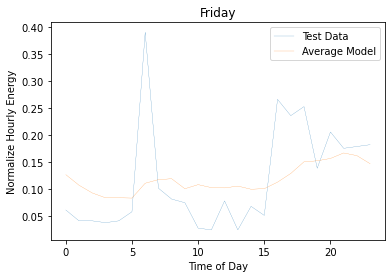

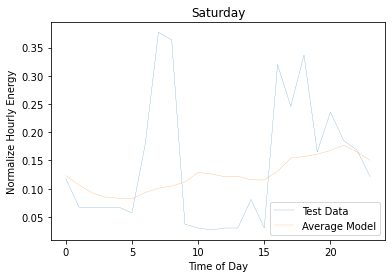

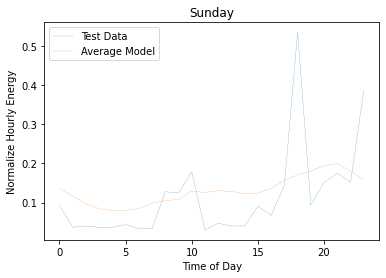

In [769]:
ax = df_t.groupby("DoW").plot.line(x = "HoD", y = ["TestBldg", "Avg"], label = ["Test Data", "Average Model"], lw = 0.2)
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
for i in range(0, len(days)):
    ax[i].set_title(days[i])
    ax[i].set_xlabel("Time of Day")
    ax[i].set_ylabel("Normalize Hourly Energy");

<b>Part B:</b> Compute the MAE for each DoW and the entire week.

In [770]:
# MAE for each DoW
diff_avg = df_t.drop(columns = ["WoY", "HoD"]).groupby("DoW").apply(lambda row: abs(row["TestBldg"] - row["Avg"]))
mae_dow_avg = [np.mean(diff_avg[i]) for i in range(0, len(days))]
mae_dow_avg

[0.10893021909824653,
 0.07923856888987395,
 0.0842578138005733,
 0.0677240801736117,
 0.06215276246574394,
 0.07901311158768702,
 0.07285382467598996]

In [771]:
# MAE for the entire week
mae_week_avg = np.mean(abs(df_t["TestBldg"] - df_t["Avg"]))
mae_week_avg

0.07916719724167519

### Problem 3: ARX Model

<b>Part C:</b> Solve your optimization problem with L = 3 and find the optimal parameter values.

In [772]:
# Stack energy consumption for all buildings
df_melt = pd.melt(df, id_vars = ["WoY", "DoW", "HoD"], var_name = "Bldg", value_name = "Energy")
# Find average energy consumption by (DoW, HoD) pairs
P_avg = df_melt.groupby(["DoW", "HoD"]).mean()[["Energy"]].reset_index().rename(columns = {"Energy": "Avg"})
# Join average energy consumption to energy consumption
P_avg = df_melt.merge(P_avg, how = "left", left_on = ["DoW", "HoD"], right_on = ["DoW", "HoD"])
# Y of LSE Opt
Y = P_avg["Energy"] - P_avg["Avg"]

In [956]:
# Number of parameters
L = 3
# PHI of LSE Opt
PHI_1 = []
PHI_2 = []
PHI_3 = []
buildings = df.iloc[:, 3:25].columns
for i in range(1,23):
    # Lag each building consumption three times (i.e. P(k-1), P(k-2), P(k-3))
    lag_df = df[[buildings[i-1]]]
    for l in range(1,L+1):
        lag_df.loc[:,'l=%i'%(l)] = lag_df.iloc[:, 0].shift(l)
    # Fill in nan's with previous values
    lag_df.fillna(lag_df.iloc[0,0], inplace = True)
    # PHI_1 = P(k-1) for all buildings
    PHI_1.extend(lag_df["l=1"].to_list())
    # PHI_2 = P(k-2) for all buildings
    PHI_2.extend(lag_df["l=2"].to_list())
    # PHI_3 = P(k-3) for all buildings
    PHI_3.extend(lag_df["l=3"].to_list())
PHI = np.array([PHI_1, PHI_2, PHI_3]).T

In [775]:
# Optimal Parameters
THETA = (np.linalg.inv(PHI.T @ PHI) @ PHI.T) @ Y
print("alpha_1*: ", THETA[0])
print("alpha_2*: ", THETA[1])
print("alpha_3*: ", THETA[2])

alpha_1*:  0.4005796104119112
alpha_2*:  -0.04082052204790382
alpha_3*:  -0.07257089285477637


<b>Part D:</b> Test your ARX model on the test data set. Generate seven plots (one for each DoW) which visualize HoD and the normalized hourly energy for the test data, average model, and ARX model. Compute the MAE for each DoW and the entire week.

In [980]:
lag_df = df_t[["TestBldg"]]
for l in range(1,L+1):
    lag_df.loc[:,'l=%i'%(l)] = lag_df.iloc[:, 0].shift(l)
lag_df.fillna(lag_df.iloc[0,0], inplace = True)

In [981]:
df_t.loc[:, "Arx"] = (lag_df["l=1"]*THETA[0]) + (lag_df["l=2"]*THETA[1]) + (lag_df["l=3"]*THETA[2]) + df_t["Avg"]
df_t.head()

/Users/taliaarauzo/miniconda3/envs/main/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,WoY,DoW,HoD,TestBldg,Avg,Arx,NN
0,36,6,0,0.094276,0.136458,0.163533,0.163113
1,36,6,1,0.037037,0.117043,0.144118,0.143698
2,36,6,2,0.040404,0.096780,0.100926,0.118042
3,36,6,3,0.037037,0.084526,0.092357,0.100712
4,36,6,4,0.037037,0.079652,0.090151,0.090443


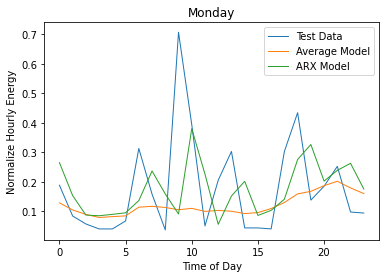

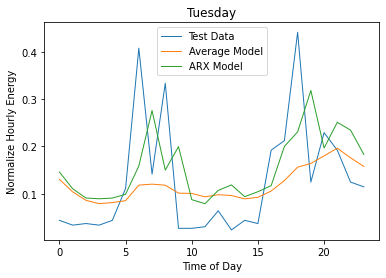

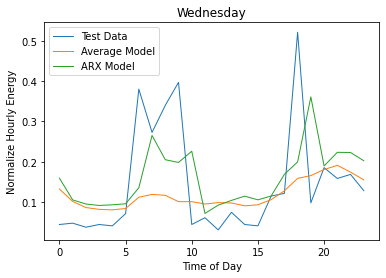

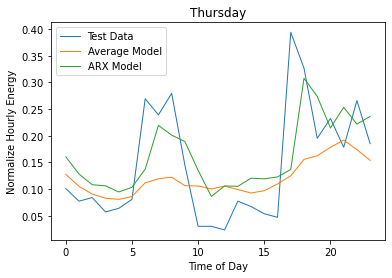

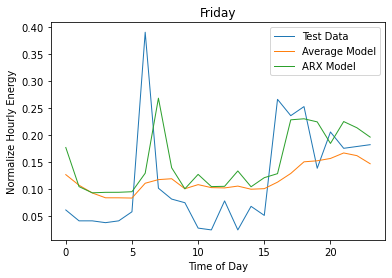

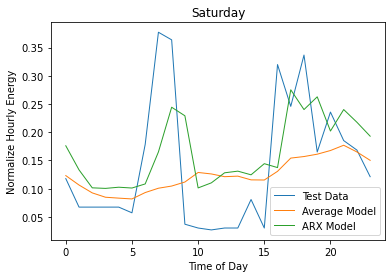

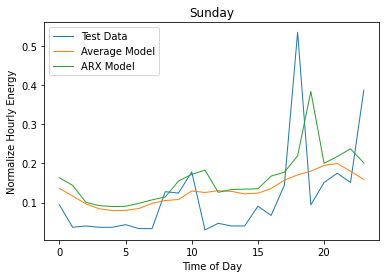

In [982]:
# Plot test data and models
ax = df_t.groupby("DoW").plot.line(x = "HoD", y = ["TestBldg", "Avg", "Arx"], label = ["Test Data", "Average Model", "ARX Model"], lw = 1)
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
for i in range(0, len(days)):
    ax[i].set_title(days[i])
    ax[i].set_xlabel("Time of Day")
    ax[i].set_ylabel("Normalize Hourly Energy");

In [1012]:
# MAE for each DoW
diff_arx = df_t.drop(columns = ["WoY", "HoD"]).groupby("DoW").apply(lambda row: abs(row["TestBldg"] - row["Arx"]))
mae_dow_arx = [np.mean(diff_arx[i]) for i in range(0, len(days))]
mae_dow_arx

[0.11792265873552848,
 0.09220006332477858,
 0.09139835009275972,
 0.0632748803506893,
 0.07034454557201776,
 0.08294266720622957,
 0.08944361448778974]

In [1013]:
# MAE for the entire week
mae_week_arx = np.mean(abs(df_t["TestBldg"] - df_t["Arx"]))
mae_week_arx

0.08678953996711332

### Problem 4: NN Model

<b>Part C:</b> Implement the gradient descent algorithm, with an initial guess of w_0 = 0 and step size of 10^-3 or 10^-4. Perform at least three steps of gradient descent and determine the optimal parameters.

In [1008]:
gamma = 10**-5
omega = np.array([0, 0, 0])
iterations = 200
x_i = PHI.T
y_i = Y
for i in range(iterations):
    z_i = omega @ x_i
    dJ_dd = y_i-np.tanh(z_i)
    dd_df = -1
    df_dz = 1-(np.tanh(z_i)**2)
    dz_dw = x_i.T
    dJ_dw = (dJ_dd * dd_df * df_dz).T @ dz_dw
    omega = omega - gamma*dJ_dw
omega

array([ 0.36041186, -0.00258802, -0.07184582])

<b>Part D:</b> Test your NN model on the test data set. Generate seven plots (one for each DoW) which visualize HoD and the normalized hourly energy for the test data, average model, ARX model, and NN model. Compute the MAE for each DoW and the entire week.

In [1009]:
df_t.loc[:, "NN"] = np.tanh(lag_df.iloc[:, 1:].values @ omega) + df_t["Avg"]
df_t.head()

/Users/taliaarauzo/miniconda3/envs/main/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,WoY,DoW,HoD,TestBldg,Avg,Arx,NN
0,36,6,0,0.094276,0.136458,0.163533,0.163412
1,36,6,1,0.037037,0.117043,0.144118,0.143998
2,36,6,2,0.040404,0.096780,0.100926,0.103111
3,36,6,3,0.037037,0.084526,0.092357,0.092219
4,36,6,4,0.037037,0.079652,0.090151,0.090234


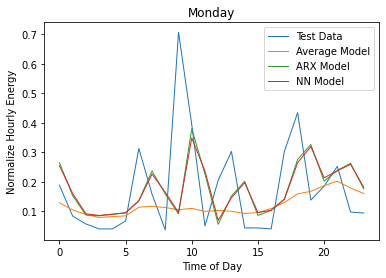

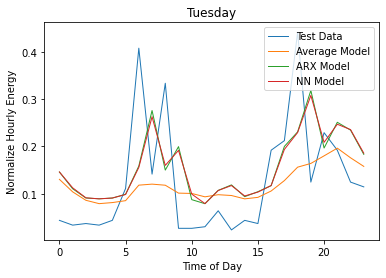

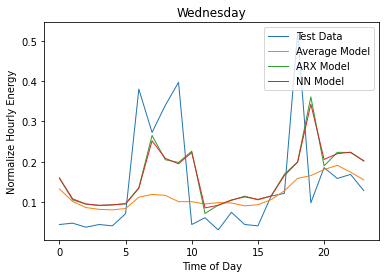

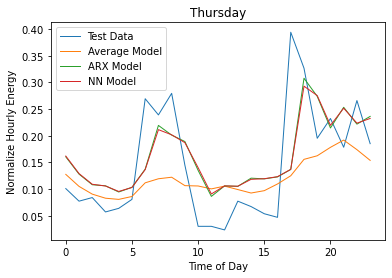

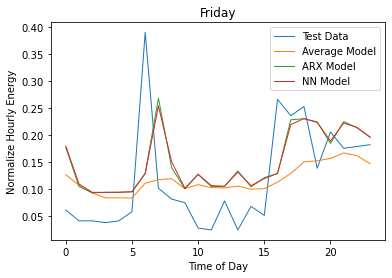

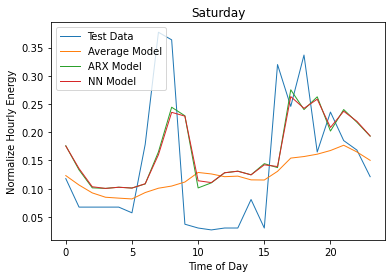

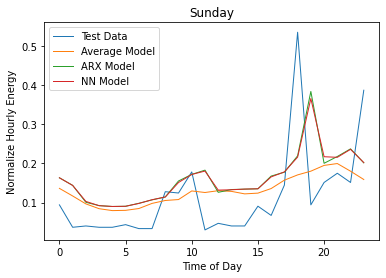

In [1010]:
# Plot test data and models
ax = df_t.groupby("DoW").plot.line(x = "HoD", y = ["TestBldg", "Avg", "Arx", "NN"], label = ["Test Data", "Average Model", "ARX Model", "NN Model"], lw = 1)
days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
for i in range(0, len(days)):
    ax[i].set_title(days[i])
    ax[i].set_xlabel("Time of Day")
    ax[i].set_ylabel("Normalize Hourly Energy");

In [1014]:
# MAE for each DoW
diff_nn = df_t.drop(columns = ["WoY", "HoD"]).groupby("DoW").apply(lambda row: abs(row["TestBldg"] - row["NN"]))
mae_dow_nn = [np.mean(diff_arx[i]) for i in range(0, len(days))]
mae_dow_nn

[0.11792265873552848,
 0.09220006332477858,
 0.09139835009275972,
 0.0632748803506893,
 0.07034454557201776,
 0.08294266720622957,
 0.08944361448778974]

In [1015]:
# MAE for the entire week
mae_week_nn = np.mean(abs(df_t["TestBldg"] - df_t["NN"]))
mae_week_nn

0.08720952927862252